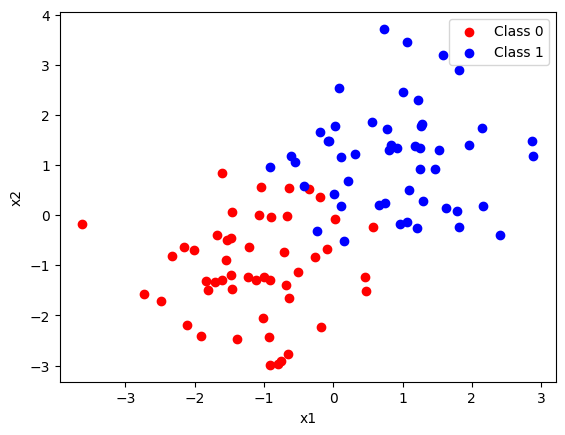

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a dataset that is linearly separable
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate data for class 0 (below the line y = x)
class_0 = np.random.randn(n_samples//2, 2) - 1

# Generate data for class 1 (above the line y = x)
class_1 = np.random.randn(n_samples//2, 2) + 1

# Combine the data
X = np.vstack((class_0, class_1))

# Labels for the classes (class 0 is -1, class 1 is 1)
y = np.hstack((np.zeros(n_samples//2), np.ones(n_samples//2)))

# Plot the data
plt.scatter(X[:n_samples//2, 0], X[:n_samples//2, 1], label='Class 0', color='red')
plt.scatter(X[n_samples//2:, 0], X[n_samples//2:, 1], label='Class 1', color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights (randomly)
input_size = 2  # Two features (x1, x2)
output_size = 1  # Single output (classification result)

# Random weights initialization for input to hidden layer
weights_input = np.random.randn(input_size, output_size)
bias_input = np.random.randn(output_size)

# Training parameters
learning_rate = 0.1
epochs = 10000

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    linear_output = np.dot(X, weights_input) + bias_input
    output = sigmoid(linear_output)

    # Calculate the error
    error = y.reshape(-1, 1) - output  # MSE loss

    # Backpropagation (Gradient Descent)
    d_output = error * sigmoid_derivative(output)  # derivative of the sigmoid w.r.t output
    weights_input += np.dot(X.T, d_output) * learning_rate  # Update weights
    bias_input += np.sum(d_output, axis=0) * learning_rate  # Update bias

    # Optionally, print the loss every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))  # MSE loss
        print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")


Epoch 0/10000 - Loss: 0.4146
Epoch 1000/10000 - Loss: 0.0357
Epoch 2000/10000 - Loss: 0.0336
Epoch 3000/10000 - Loss: 0.0318
Epoch 4000/10000 - Loss: 0.0310
Epoch 5000/10000 - Loss: 0.0305
Epoch 6000/10000 - Loss: 0.0302
Epoch 7000/10000 - Loss: 0.0300
Epoch 8000/10000 - Loss: 0.0298
Epoch 9000/10000 - Loss: 0.0297


In [ ]:
# Generate some test data
test_data = np.array([[3, 4], [-1,-1], [-3,-3], [1,6]])
test_output = sigmoid(np.dot(test_data, weights_input) + bias_input)

# Print test results
print("Test outputs (probabilities):")
print(test_output)

# Convert probabilities to binary classification (0 or 1)
predictions = (test_output > 0.5).astype(int)
print("Predictions (0 or 1):")
print(predictions)


Test outputs (probabilities):
[[1.00000000e+00]
 [3.17154887e-18]
 [1.30661784e-48]
 [1.00000000e+00]]
Predictions (0 or 1):
[[1]
 [0]
 [0]
 [1]]


Epoch 0/10000 - Loss: 0.0296
Epoch 1000/10000 - Loss: 0.0294
Epoch 2000/10000 - Loss: 0.0293
Epoch 3000/10000 - Loss: 0.0293
Epoch 4000/10000 - Loss: 0.0292
Epoch 5000/10000 - Loss: 0.0291
Epoch 6000/10000 - Loss: 0.0290
Epoch 7000/10000 - Loss: 0.0289
Epoch 8000/10000 - Loss: 0.0289
Epoch 9000/10000 - Loss: 0.0288


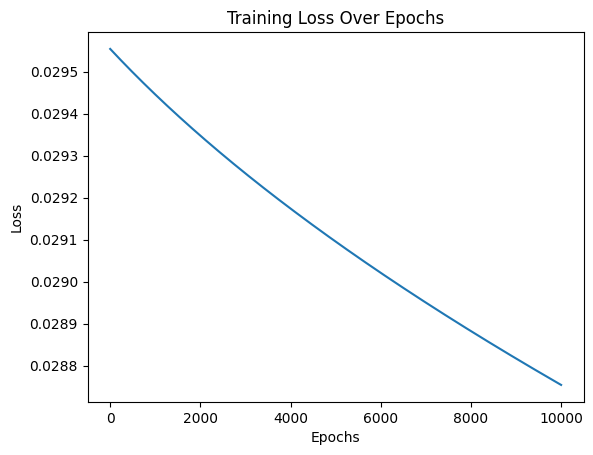

In [ ]:
# Store loss over epochs
losses = []

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    linear_output = np.dot(X, weights_input) + bias_input
    output = sigmoid(linear_output)

    # Calculate the error
    error = y.reshape(-1, 1) - output  # MSE loss

    # Backpropagation (Gradient Descent)
    d_output = error * sigmoid_derivative(output)  # derivative of the sigmoid w.r.t output
    weights_input += np.dot(X.T, d_output) * learning_rate  # Update weights
    bias_input += np.sum(d_output, axis=0) * learning_rate  # Update bias

    # Optionally, store the loss
    loss = np.mean(np.square(error))  # MSE loss
    losses.append(loss)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")

# Plot the loss over epochs
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()


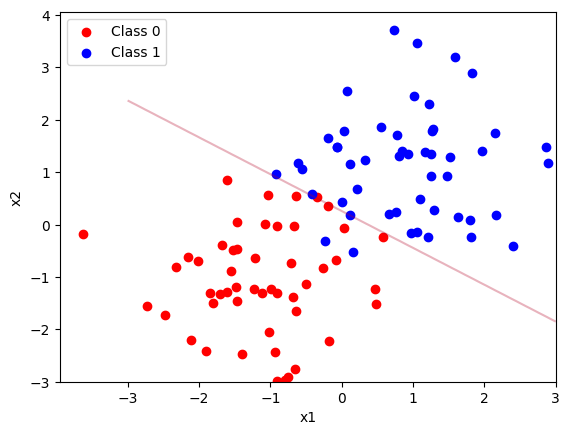

In [ ]:
# Generate a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Get the network's prediction for each point on the grid
Z = sigmoid(np.dot(grid, weights_input) + bias_input)
Z = Z.reshape(xx.shape)

# Plot the data and decision boundary
plt.contour(xx, yy, Z, levels=[0, 0.5], cmap='coolwarm', alpha=0.3)
plt.scatter(X[:n_samples//2, 0], X[:n_samples//2, 1], label='Class 0', color='red')
plt.scatter(X[n_samples//2:, 0], X[n_samples//2:, 1], label='Class 1', color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


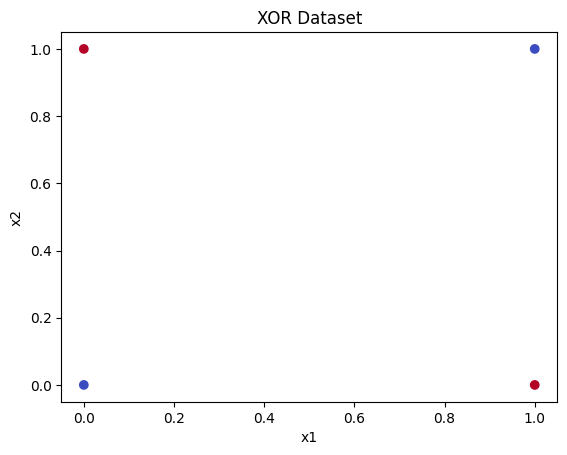

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR output

# Plot XOR dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR Dataset')
plt.show()


In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights (randomly)
input_size = 2  # Two features (x1, x2)
output_size = 1  # Single output (classification result)

# Random weights initialization for input to hidden layer
np.random.seed(42)
weights_input = np.random.randn(input_size, output_size)
bias_input = np.random.randn(output_size)

# Training parameters
learning_rate = 0.1
epochs = 10000

# Train the neural network
for epoch in range(epochs):
    # Forward pass
    linear_output = np.dot(X, weights_input) + bias_input
    output = sigmoid(linear_output)

    # Calculate the error
    error = y.reshape(-1, 1) - output  # MSE loss

    # Backpropagation (Gradient Descent)
    d_output = error * sigmoid_derivative(output)  # derivative of the sigmoid w.r.t output
    weights_input += np.dot(X.T, d_output) * learning_rate  # Update weights
    bias_input += np.sum(d_output, axis=0) * learning_rate  # Update bias

    # Optionally, print the loss every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))  # MSE loss
        print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")


Epoch 0/10000 - Loss: 0.2916
Epoch 1000/10000 - Loss: 0.2500
Epoch 2000/10000 - Loss: 0.2500
Epoch 3000/10000 - Loss: 0.2500
Epoch 4000/10000 - Loss: 0.2500
Epoch 5000/10000 - Loss: 0.2500
Epoch 6000/10000 - Loss: 0.2500
Epoch 7000/10000 - Loss: 0.2500
Epoch 8000/10000 - Loss: 0.2500
Epoch 9000/10000 - Loss: 0.2500


Model outputs (probabilities):
[[0.5]
 [0.5]
 [0.5]
 [0.5]]
Predictions (0 or 1):
[[0]
 [0]
 [0]
 [0]]


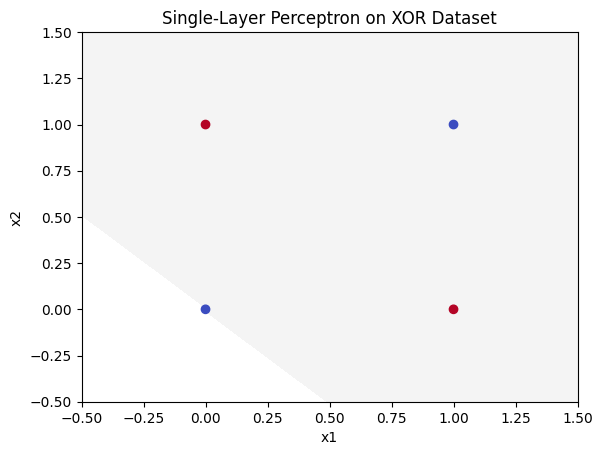

In [ ]:
# Test the model with the same XOR data
output = sigmoid(np.dot(X, weights_input) + bias_input)

# Print the model output (probabilities)
print("Model outputs (probabilities):")
print(output)

# Convert the probabilities to binary predictions (0 or 1)
predictions = (output > 0.5).astype(int)
print("Predictions (0 or 1):")
print(predictions)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Get the network's prediction for each point on the grid
Z = sigmoid(np.dot(grid, weights_input) + bias_input)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5], cmap='coolwarm', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Single-Layer Perceptron on XOR Dataset')
plt.show()


Epoch 0/10000 - Loss: 0.3037
Epoch 1000/10000 - Loss: 0.0044
Epoch 2000/10000 - Loss: 0.0017
Epoch 3000/10000 - Loss: 0.0010
Epoch 4000/10000 - Loss: 0.0007
Epoch 5000/10000 - Loss: 0.0005
Epoch 6000/10000 - Loss: 0.0004
Epoch 7000/10000 - Loss: 0.0004
Epoch 8000/10000 - Loss: 0.0003
Epoch 9000/10000 - Loss: 0.0003
Model outputs (probabilities):
[[0.01967369]
 [0.9900959 ]
 [0.99009426]
 [0.01967369]]
Predictions (0 or 1):
[[0]
 [1]
 [1]
 [0]]


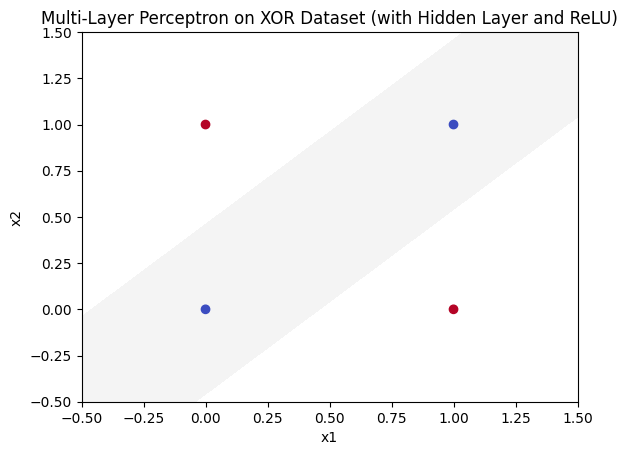

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return (x > 0).astype(float)

# Generate XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR output

# Initialize weights for a 2-layer MLP (1 hidden layer + 1 output layer)
input_size = 2  # Two features (x1, x2)
hidden_size = 2 # Two neurons in the hidden layer
output_size = 1  # Single output (classification result)

# Randomly initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)  # Weights from input to hidden layer
bias_input_hidden = np.random.randn(hidden_size)  # Biases for hidden layer
weights_hidden_output = np.random.randn(hidden_size, output_size)  # Weights from hidden to output layer
bias_hidden_output = np.random.randn(output_size)  # Bias for output layer

# Training parameters
learning_rate = 0.1
epochs = 10000

# Train the neural network
for epoch in range(epochs):
    # Forward pass: Input to Hidden Layer
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_input_hidden
    hidden_layer_output = relu(hidden_layer_input)  # ReLU activation for hidden layer

    # Forward pass: Hidden to Output Layer
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_hidden_output
    output = sigmoid(output_layer_input)  # Sigmoid activation for output layer

    # Calculate the error (Mean Squared Error)
    error = y.reshape(-1, 1) - output  # MSE loss

    # Backpropagation (Gradient Descent)

    # Output layer error
    d_output = error * sigmoid_derivative(output)  # derivative of sigmoid w.r.t output

    # Hidden layer error
    d_hidden = d_output.dot(weights_hidden_output.T) * relu_derivative(hidden_layer_output)  # derivative of ReLU

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate  # Update weights for hidden-output
    bias_hidden_output += np.sum(d_output, axis=0) * learning_rate  # Update bias for output layer

    weights_input_hidden += X.T.dot(d_hidden) * learning_rate  # Update weights for input-hidden
    bias_input_hidden += np.sum(d_hidden, axis=0) * learning_rate  # Update bias for hidden layer

    # Optionally, print the loss every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))  # MSE loss
        print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")

# Test the model with the same XOR data
output = sigmoid(np.dot(relu(np.dot(X, weights_input_hidden) + bias_input_hidden), weights_hidden_output) + bias_hidden_output)

# Print the model output (probabilities)
print("Model outputs (probabilities):")
print(output)

# Convert the probabilities to binary predictions (0 or 1)
predictions = (output > 0.5).astype(int)
print("Predictions (0 or 1):")
print(predictions)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Get the network's prediction for each point on the grid
Z = sigmoid(np.dot(relu(np.dot(grid, weights_input_hidden) + bias_input_hidden), weights_hidden_output) + bias_hidden_output)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5], cmap='coolwarm', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Multi-Layer Perceptron on XOR Dataset (with Hidden Layer and ReLU)')
plt.show()
